In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [206]:
df = pd.read_csv('sac_kings.csv')

In [207]:
df.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'first_quarter_home',
       'second_quarter_home', 'third_quarter_home', 'fourth_quarter_home',
       'first_quarter_away', 'second_quarter_away', 'third_quarter_away',
       'fourth_quarter_away', 'event_time'],
      dtype='object')

In [208]:
def swap(A, B, index):
    placeholder = A[index]
    A[index] = B[index]
    B[index] = placeholder
    
    return (A, B)

In [209]:
df['Home'] = [i for i in range(len(df.home_team))]
for team in range(len(df.home_team)):
    if df.home_team[team] != 'Philadelphia 76ers':
        df['Home'][team] = 0
        df.home_team, df.away_team =  swap(df.home_team, df.away_team, team)
        
        df.first_quarter_home, df.first_quarter_away = swap(df.first_quarter_home, df.first_quarter_away, team)
        df.second_quarter_home, df.second_quarter_away = swap(df.second_quarter_home, df.second_quarter_away, team)
        df.third_quarter_home, df.third_quarter_away = swap(df.third_quarter_home, df.third_quarter_away, team)
        df.fourth_quarter_home, df.fourth_quarter_away = swap(df.fourth_quarter_home, df.fourth_quarter_away, team)
    else:
        df['Home'][team] = 1
                

C:\Users\user\AppData\Local\Temp\ipykernel_1280\1565766052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home'][team] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_1280\3371292939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A[index] = B[index]
C:\Users\user\AppData\Local\Temp\ipykernel_1280\1565766052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home'][team] = 1


In [210]:
df[:5]

,Unnamed: 0,home_team,away_team,first_quarter_home,second_quarter_home,third_quarter_home,fourth_quarter_home,first_quarter_away,second_quarter_away,third_quarter_away,fourth_quarter_away,event_time,Home
0,0,Sacramento Kings,Denver Nuggets,43,24,14,14,26,33,24,26,09.04. 20:30,0
1,1,Golden State Warriors,Sacramento Kings,32,21,33,33,16,32,25,24,08.04. 03:00,0
2,2,Sacramento Kings,Dallas Mavericks,27,44,21,27,28,32,32,31,06.04. 01:30,0
3,3,Sacramento Kings,New Orleans Pelicans,25,40,31,25,22,32,26,23,05.04. 01:00,0
4,4,San Antonio Spurs,Sacramento Kings,32,31,33,27,30,28,34,31,02.04. 23:00\nAOT,0


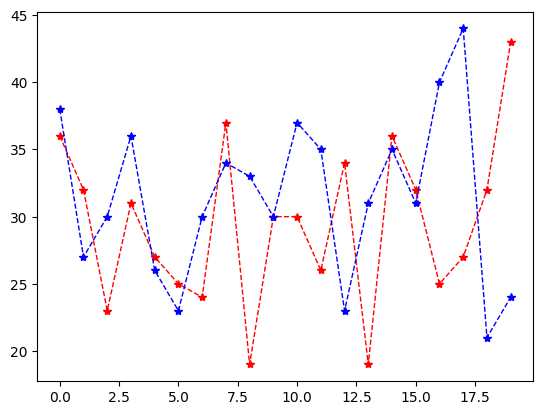

In [211]:
x1 = list(df['first_quarter_home'][:20][::-1])
x2 = list(df['second_quarter_home'][:20][::-1])
x3 = list(df['third_quarter_home'][:20][::-1])
x4 = list(df['fourth_quarter_home'][:20][::-1])

plt.plot(x1, linestyle='--', marker='*', linewidth=1, color='r')
plt.plot(x2, linestyle='--', marker='*', linewidth=1, color='b')
# plt.plot(x3, linestyle='--', marker='*', linewidth=0.5, color='g')
# plt.plot(x4, linestyle='--', marker='*', linewidth=1, color='y')

In [212]:
for i in range(len(list(df['first_quarter_home'][::-1]))):
    if list(df['first_quarter_home'][::-1])[i] <= 21:
        print(f"First Quarter: {list(df['first_quarter_home'][::-1])[i]}                    Second Quarter: {list(df['second_quarter_home'][::-1])[i]}")

First Quarter: 21                    Second Quarter: 37
First Quarter: 19                    Second Quarter: 26
First Quarter: 17                    Second Quarter: 35
First Quarter: 13                    Second Quarter: 27
First Quarter: 15                    Second Quarter: 17
First Quarter: 13                    Second Quarter: 14
First Quarter: 21                    Second Quarter: 23
First Quarter: 13                    Second Quarter: 24
First Quarter: 15                    Second Quarter: 17
First Quarter: 20                    Second Quarter: 34
First Quarter: 18                    Second Quarter: 30
First Quarter: 20                    Second Quarter: 23
First Quarter: 20                    Second Quarter: 30
First Quarter: 16                    Second Quarter: 30
First Quarter: 20                    Second Quarter: 29
First Quarter: 18                    Second Quarter: 39
First Quarter: 21                    Second Quarter: 19
First Quarter: 13                    Second Quar

In [213]:
print(list(df['first_quarter_home'][:10][::-1]))
print(list(df['second_quarter_home'][:10][::-1]))
print(list(df['third_quarter_home'][:10][::-1]))
print(list(df['fourth_quarter_home'][:10][::-1]))

[30, 26, 34, 19, 36, 32, 25, 27, 32, 43]
[37, 35, 23, 31, 35, 31, 40, 44, 21, 24]
[26, 17, 29, 33, 33, 33, 31, 21, 33, 14]
[34, 35, 33, 37, 34, 27, 25, 27, 33, 14]


In [214]:
ratings = {'Denver Nuggets': 9.5, 'Memphis Grizzlies': 9.0, 'Sacramento Kings': 8.5, 'Phoenix Suns': 8, 'Los Angeles Clippers': 7.5, 
 'Golden State Warriors': 7, 'Los Angeles Lakers': 6.5, 'Minnesota Timberwolves': 6,
'New Orleans Pelicans': 5.5, 'Oklahoma City Thunder': 5, 'Dallas Mavericks': 4.5, 
'Utah Jazz White': 4,'Utah Jazz': 4,'Utah Jazz Blue': 4, 'Portland Trail Blazers': 3.5, 'Houston Rockets': 3, 
 'San Antonio Spurs': 2.5, 'Milwaukee Bucks': 9.5, 'Boston Celtics': 9, 
'Philadelphia 76ers': 8.5, 'Cleveland Cavaliers': 8, 'New York Knicks': 7.5,
'Brooklyn Nets': 7, 'Miami Heat': 6.5, 'Atlanta Hawks': 6,
'Toronto Raptors': 5.5, 'Chicago Bulls': 5, 'Washington Wizards': 4.5, 
'Indiana Pacers':4, 'Orlando Magic': 3.5, 'Charlotte Hornets': 3, 'Detroit Pistons': 2.5}

In [215]:
print(ratings)

{'Denver Nuggets': 9.5, 'Memphis Grizzlies': 9.0, 'Sacramento Kings': 8.5, 'Phoenix Suns': 8, 'Los Angeles Clippers': 7.5, 'Golden State Warriors': 7, 'Los Angeles Lakers': 6.5, 'Minnesota Timberwolves': 6, 'New Orleans Pelicans': 5.5, 'Oklahoma City Thunder': 5, 'Dallas Mavericks': 4.5, 'Utah Jazz White': 4, 'Utah Jazz': 4, 'Utah Jazz Blue': 4, 'Portland Trail Blazers': 3.5, 'Houston Rockets': 3, 'San Antonio Spurs': 2.5, 'Milwaukee Bucks': 9.5, 'Boston Celtics': 9, 'Philadelphia 76ers': 8.5, 'Cleveland Cavaliers': 8, 'New York Knicks': 7.5, 'Brooklyn Nets': 7, 'Miami Heat': 6.5, 'Atlanta Hawks': 6, 'Toronto Raptors': 5.5, 'Chicago Bulls': 5, 'Washington Wizards': 4.5, 'Indiana Pacers': 4, 'Orlando Magic': 3.5, 'Charlotte Hornets': 3, 'Detroit Pistons': 2.5}


In [216]:
ratings['Miami Heat']
ratings[df.home_team[2]]

8.5

In [217]:
df[:5]

,Unnamed: 0,home_team,away_team,first_quarter_home,second_quarter_home,third_quarter_home,fourth_quarter_home,first_quarter_away,second_quarter_away,third_quarter_away,fourth_quarter_away,event_time,Home
0,0,Sacramento Kings,Denver Nuggets,43,24,14,14,26,33,24,26,09.04. 20:30,0
1,1,Golden State Warriors,Sacramento Kings,32,21,33,33,16,32,25,24,08.04. 03:00,0
2,2,Sacramento Kings,Dallas Mavericks,27,44,21,27,28,32,32,31,06.04. 01:30,0
3,3,Sacramento Kings,New Orleans Pelicans,25,40,31,25,22,32,26,23,05.04. 01:00,0
4,4,San Antonio Spurs,Sacramento Kings,32,31,33,27,30,28,34,31,02.04. 23:00\nAOT,0


In [218]:
new_df = df

for team in range(len(new_df.home_team)):
    if new_df.home_team[team] not in ratings.keys() or new_df.away_team[team] not in ratings.keys():
        new_df.drop(team, axis=0, inplace=True)
    else:
        new_df.home_team[team] = ratings[new_df.home_team[team]]
        new_df.away_team[team] = ratings[new_df.away_team[team]]


C:\Users\user\AppData\Local\Temp\ipykernel_1280\3260995663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.home_team[team] = ratings[new_df.home_team[team]]
C:\Users\user\AppData\Local\Temp\ipykernel_1280\3260995663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.away_team[team] = ratings[new_df.away_team[team]]


In [219]:
new_df

,Unnamed: 0,home_team,away_team,first_quarter_home,second_quarter_home,third_quarter_home,fourth_quarter_home,first_quarter_away,second_quarter_away,third_quarter_away,fourth_quarter_away,event_time,Home
0,0,8.5,9.5,43,24,14,14,26,33,24,26,09.04. 20:30,0
1,1,7,8.5,32,21,33,33,16,32,25,24,08.04. 03:00,0
2,2,8.5,4.5,27,44,21,27,28,32,32,31,06.04. 01:30,0
3,3,8.5,5.5,25,40,31,25,22,32,26,23,05.04. 01:00,0
4,4,2.5,8.5,32,31,33,27,30,28,34,31,02.04. 23:00\nAOT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,8.5,8.5,42,24,21,32,32,39,20,20,10.02.2021,0
236,236,8.5,7.5,22,32,25,34,24,27,29,30,07.02.2021,0
237,237,9.5,8.5,25,27,29,33,26,27,34,32,06.02.2021,0
238,238,9,8.5,26,25,31,29,22,30,29,35,04.02.2021,0


In [220]:
x = df[['home_team', 'away_team', 'Home']][::-1]
y = []
for i in df.index:
    try:
        y.append(df.first_quarter_home[i] + df.second_quarter_home[i] + df.third_quarter_home[i] + df.fourth_quarter_home[i] + df.first_quarter_away[i] + df.second_quarter_away[i] + df.third_quarter_away[i] + df.fourth_quarter_away[i])
    except:
        continue
# y = df['first_quarter_home'][::-1]
y=y[::-1]
x = np.asarray(x)

In [221]:
x.shape

(240, 3)

In [238]:
x_train, x_test = x[:222], x[222:]
y_train, y_test = y[:222], y[222:]
print(x.shape)

(240, 3)


In [239]:
y_test[:5]

[239, 247, 257, 231, 197]

In [240]:
rng = RandomForestRegressor(max_depth=100, n_estimators=4947,random_state=9)
rng.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=4947, random_state=9)

In [241]:
# rng = MLPRegressor(max_iter=1500, random_state=9)
# rng.fit(x_train, y_train)

In [245]:
y_pred = rng.predict(x_test)

In [246]:
error = 0
for i in range(len(y_pred)):
    print(f"Expected {y_test[i]}              Got {y_pred[i]}.         Error: -> {(y_test[i]-y_pred[i])} \n\n")
    if y_test[i] > y_pred[i]:
        error += y_test[i]-y_pred[i]
    else: 
        error += y_pred[i]-y_test[i]

Expected 239              Got 223.59185575671316.         Error: -> 15.408144243286841 


Expected 247              Got 212.5362389269559.         Error: -> 34.46376107304411 


Expected 257              Got 238.1245557064284.         Error: -> 18.875444293571604 


Expected 231              Got 221.93735999155922.         Error: -> 9.06264000844078 


Expected 197              Got 219.9257872199693.         Error: -> -22.925787219969294 


Expected 250              Got 214.96867368302705.         Error: -> 35.03132631697295 


Expected 248              Got 227.0482410286937.         Error: -> 20.951758971306305 


Expected 241              Got 221.90271928784617.         Error: -> 19.097280712153832 


Expected 262              Got 222.45717227352856.         Error: -> 39.542827726471444 


Expected 234              Got 225.51191290040444.         Error: -> 8.48808709959556 


Expected 234              Got 242.87347878869508.         Error: -> -8.873478788695081 


Expected 200       

In [247]:
print(f"The error is {error/len(y_test)}")

The error is 20.66923915001185


In [248]:
y_pred = np.append(y_pred, rng.predict(np.asarray([8.5, 7, 1]).reshape(1,-1)))
rng.predict(np.asarray([8.5, 7, 1]).reshape(1,-1))

array([219.63025583])

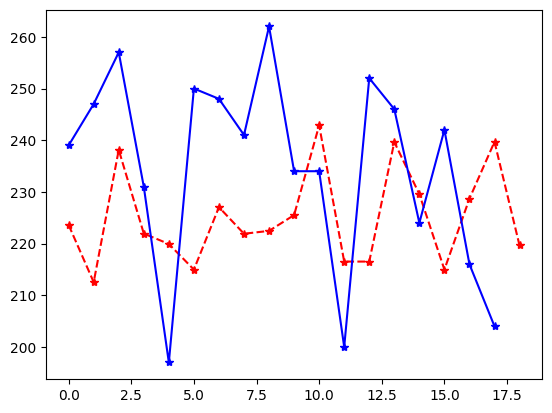

In [249]:
plt.plot(y_pred, color='r', marker='*', linestyle='--')
plt.plot(y_test, color='b', marker='*')